In [ ]:
# Installing pingouin library
!pip install pingouin

     |████████████████████████████████| 205 kB 5.0 MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.12-py3-none-any.whl size=204754 sha256=a7adcca7357bf98d4ea20444409c04eacbf99b94e0a69bf8217e82f4825b7e9f
  Stored in directory: /root/.cache/pip/wheels/5b/8a/ed/fafe2714a0f047d64fb582105b174b5e5218c82a0d787bbec4
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=89dc6f01f70840816186c2dab5f78e6618ec2520d32335e8147224f0d7e885f1
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


In [ ]:
# Importing relevant and needed libraries
import csv
import pandas as pd
import numpy as np
import pingouin as pg
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import patsy

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
patsy.__version__

'0.5.1'

In [ ]:
# Mounting Google Drive so I can open files
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
# Setting up file path and opening csv file for our dataset
path = "/gdrive/MyDrive/DS4A/Team 98 Capstone Project/Datasets/Final Datasets/Merged_data_for_analysis_8.01.csv"
df = pd.read_csv(path)

df.head()

,Geographic Area Name,Estimate!!Total:_race,Estimate!!Total:!!White alone,Estimate!!Total:!!Black or African American alone,Estimate!!Total:!!American Indian and Alaska Native alone,Estimate!!Total:!!Asian alone,Estimate!!Total:!!Native Hawaiian and Other Pacific Islander alone,Estimate!!Total:!!Some other race alone,Estimate!!Total:!!Two or more races:,Estimate!!Total:!!Two or more races:!!Two races including Some other race,"Estimate!!Total:!!Two or more races:!!Two races excluding Some other race, and three or more races",Estimate!!Total:_income,Estimate!!Total:!!Income in the past 12 months below poverty level:,Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:,Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:!!Speak only English,Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:!!Speak Spanish,Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:!!Speak other Indo-European languages,Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:!!Speak Asian and Pacific Island languages,Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:!!Speak other languages,Estimate!!Total:!!Income in the past 12 months below poverty level:!!18 years and over:,Estimate!!Total:!!Income in the past 12 months below poverty level:!!18 years and over:!!Speak only English,Estimate!!Total:!!Income in the past 12 months below poverty level:!!18 years and over:!!Speak Spanish,Estimate!!Total:!!Income in the past 12 months below poverty level:!!18 years and over:!!Speak other Indo-European languages,Estimate!!Total:!!Income in the past 12 months below poverty level:!!18 years and over:!!Speak Asian and Pacific Island languages,Estimate!!Total:!!Income in the past 12 months below poverty level:!!18 years and over:!!Speak other languages,Estimate!!Total:!!Income in the past 12 months at or above poverty level:,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!5 to 17 years:,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!5 to 17 years:!!Speak only English,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!5 to 17 years:!!Speak Spanish,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!5 to 17 years:!!Speak other Indo-European languages,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!5 to 17 years:!!Speak Asian and Pacific Island languages,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!5 to 17 years:!!Speak other languages,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!18 years and over:,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!18 years and over:!!Speak only English,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!18 years and over:!!Speak Spanish,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!18 years and over:!!Speak other Indo-European languages,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!18 years and over:!!Speak Asian and Pacific Island languages,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!18 years and over:!!Speak other languages,Estimate!!Total:_acs_internet,Estimate!!Total:!!With an Internet subscription,...,Estimate!!Unemployment rate!!Population 20 to 64 years!!SEX!!Male,Estimate!!Unemployment rate!!Population 20 to 64 years!!SEX!!Female,Estimate!!Unemployment rate!!Population 20 to 64 years!!SEX!!Female!!With own children under 18 years,Estimate!!Unemployment rate!!Population 20 to 64 years!!SEX!!Female!!With own children under 18 years!!With own children under 6 years only,Estimate!!Unemployment rate!!Population 20 to 64 years!!SEX!!Female!!With own children under 18 years!!With own children under 6 years and 6 to 17 years,Estimate

In [ ]:
#List columns for review
list(df.columns)

['Geographic Area Name',
 'Estimate!!Total:_race',
 'Estimate!!Total:!!White alone',
 'Estimate!!Total:!!Black or African American alone',
 'Estimate!!Total:!!American Indian and Alaska Native alone',
 'Estimate!!Total:!!Asian alone',
 'Estimate!!Total:!!Native Hawaiian and Other Pacific Islander alone',
 'Estimate!!Total:!!Some other race alone',
 'Estimate!!Total:!!Two or more races:',
 'Estimate!!Total:!!Two or more races:!!Two races including Some other race',
 'Estimate!!Total:!!Two or more races:!!Two races excluding Some other race, and three or more races',
 'Estimate!!Total:_income',
 'Estimate!!Total:!!Income in the past 12 months below poverty level:',
 'Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:',
 'Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:!!Speak only English',
 'Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:!!Speak Spanish',
 'Estimate!!Total:!!Income in

In [ ]:
# Loop to rename columns to shorter names
with open('/gdrive/MyDrive/data/metadata_clean.csv', mode='r') as infile:
    reader = csv.reader(infile)
    mydict = {rows[0]:rows[1] for rows in reader}

df_renamed = df.rename(mapper=mydict,axis='columns')

In [ ]:
# Creating a copy of the dataframe with renamed columns
df = df_renamed.copy()

In [ ]:
#Preview first five rows
df.head()

,geo,tot_race,tot_white,tot_black,tot_native,tot_asian,tot_hpi,tot_other,tot_two_or_more,Estimate!!Total:!!Two or more races:!!Two races including Some other race,"Estimate!!Total:!!Two or more races:!!Two races excluding Some other race, and three or more races",tot_total,Estimate!!Total:!!Income in the past 12 months below poverty level:,Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:,Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:!!Speak only English,Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:!!Speak Spanish,Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:!!Speak other Indo-European languages,Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:!!Speak Asian and Pacific Island languages,Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:!!Speak other languages,tot_18_years_and,Estimate!!Total:!!Income in the past 12 months below poverty level:!!18 years and over:!!Speak only English,Estimate!!Total:!!Income in the past 12 months below poverty level:!!18 years and over:!!Speak Spanish,Estimate!!Total:!!Income in the past 12 months below poverty level:!!18 years and over:!!Speak other Indo-European languages,Estimate!!Total:!!Income in the past 12 months below poverty level:!!18 years and over:!!Speak Asian and Pacific Island languages,Estimate!!Total:!!Income in the past 12 months below poverty level:!!18 years and over:!!Speak other languages,Estimate!!Total:!!Income in the past 12 months at or above poverty level:,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!5 to 17 years:,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!5 to 17 years:!!Speak only English,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!5 to 17 years:!!Speak Spanish,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!5 to 17 years:!!Speak other Indo-European languages,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!5 to 17 years:!!Speak Asian and Pacific Island languages,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!5 to 17 years:!!Speak other languages,tot_18_years_and,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!18 years and over:!!Speak only English,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!18 years and over:!!Speak Spanish,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!18 years and over:!!Speak other Indo-European languages,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!18 years and over:!!Speak Asian and Pacific Island languages,Estimate!!Total:!!Income in the past 12 months at or above poverty level:!!18 years and over:!!Speak other languages,Estimate!!Total: acs internet,Estimate!!Total:!!With an Internet subscription,...,UR_20to64_male,UR_20to64_female,UR_20to64_female_withchildren,UR_20to64_withchildren_under6,UR_20to64_withchildren_to17,UR_20to64_withchildren_6to17,UR_20to64_belowpoverty,UR_20to64_abovepoverty,UR_20to64_withdisability,Estimate!!Unemployment rate!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years,Estimate!!Unemployment rate!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!Less than high school graduate,Estimate!!Unemployment rate!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!High school graduate (includes equivalency),Estimate!!Unemployment rate!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!Some college or associate's degree,Estimate!!Unemployment rate!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!Bachelor's degree or higher,BROADBAND USAGE,ZCTA_x,white_pct,black_pct,AmIn_pct,asian_pct,PI_pct,OtherRace_pct,two_races_pct,below_poverty_pct,tot_pop,yes_internet,yes_internet_25mbps,no_internet,brdbnd_pct,ZCTA_y,age_25_plus,over25_HS_o

In [ ]:
#Create a new column for no internet percentage
df['no_internet_pct'] = df['no_internet']/df['tot_pop']

In [ ]:
# Initiating an empty list
columns_list = []

# Loop to collect the names of all the columns in the dataframe
for i in df.columns:
  columns_list.append(i)

In [ ]:
#Checking columns_list
columns_list

['geo',
 'tot_race',
 'tot_white',
 'tot_black',
 'tot_native',
 'tot_asian',
 'tot_hpi',
 'tot_other',
 'tot_two_or_more',
 'Estimate!!Total:!!Two or more races:!!Two races including Some other race',
 'Estimate!!Total:!!Two or more races:!!Two races excluding Some other race, and three or more races',
 'tot_total',
 'Estimate!!Total:!!Income in the past 12 months below poverty level:',
 'Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:',
 'Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:!!Speak only English',
 'Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:!!Speak Spanish',
 'Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:!!Speak other Indo-European languages',
 'Estimate!!Total:!!Income in the past 12 months below poverty level:!!5 to 17 years:!!Speak Asian and Pacific Island languages',
 'Estimate!!Total:!!Income in the past 12 months below 

In [ ]:
#Create list with names of variables to be tested
test_columns_v2 = [x for x in columns_list if '_pct' in x]

test_columns_v2

['white_pct',
 'black_pct',
 'AmIn_pct',
 'asian_pct',
 'PI_pct',
 'OtherRace_pct',
 'two_races_pct',
 'below_poverty_pct',
 'brdbnd_pct',
 'over25_HS_or_higher_pct',
 'no_internet_pct']

In [ ]:
#Deleting no_internet_pct
del test_columns_v2[-1]

In [ ]:
#Deleting brdbnd_pct
del test_columns_v2[-2]

In [ ]:
#Create list with column names for unemployment rates
UR_columns = [x for x in columns_list if 'UR_' in x]

NameError: ignored

In [ ]:
#Add list with unemployment rates to test_columns_v2
test_columns_v2.extend(UR_columns)

In [ ]:
#Check list to make sure all desired items are there
test_columns_v2

['white_pct',
 'black_pct',
 'AmIn_pct',
 'asian_pct',
 'PI_pct',
 'OtherRace_pct',
 'two_races_pct',
 'below_poverty_pct',
 'over25_HS_or_higher_pct',
 'UR_16over',
 'UR_16to19',
 'UR_20to24',
 'UR_25to29',
 'UR_30to34',
 'UR_35to44',
 'UR_45to54',
 'UR_55to59',
 'UR_60to64',
 'UR_65to74',
 'UR_75over',
 'UR_white',
 'UR_black',
 'UR_AmIn',
 'UR_asian',
 'UR_PI',
 'UR_other',
 'UR_tworaces',
 'UR_hispanic',
 'UR_20to64',
 'UR_20to64_male',
 'UR_20to64_female',
 'UR_20to64_female_withchildren',
 'UR_20to64_withchildren_under6',
 'UR_20to64_withchildren_to17',
 'UR_20to64_withchildren_6to17',
 'UR_20to64_belowpoverty',
 'UR_20to64_abovepoverty',
 'UR_20to64_withdisability']

In [ ]:
#Create variable formatting list for use in scikit learn regression formula
all_variables = " + ".join(test_columns_v2)

In [ ]:
#Code for linear regression formula testing variables against no internet percentage variable
formula0 = f'no_internet_pct ~ {all_variables}'
model0 = sm.ols(formula = formula0, data = df)
fitted0 = model0.fit()
print(fitted0.summary())

                            OLS Regression Results                            
Dep. Variable:        no_internet_pct   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     209.9
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:47:44   Log-Likelihood:                 5746.2
No. Observations:                3412   AIC:                        -1.142e+04
Df Residuals:                    3374   BIC:                        -1.118e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [ ]:
#Code for linear regression formula testing variables against broadband percentage variable
brdbnd_formula = f'brdbnd_pct ~ {all_variables}'
brdbnd_model = sm.ols(formula = brdbnd_formula, data = df)
brdbnd_fitted = brdbnd_model.fit()
print(brdbnd_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:             brdbnd_pct   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:47:58   Log-Likelihood:                 5700.4
No. Observations:                3412   AIC:                        -1.132e+04
Df Residuals:                    3374   BIC:                        -1.109e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

# ***IGNORE EVERYTHING UNDERNEATH THIS. IT'S NO LONGER RELEVANT/NEEDED***

In [ ]:
internet_columns = [x for x in columns_list if '_internet' in x]

del internet_columns[0:2]

In [ ]:
results = {}

for i in test_columns:
  test = pg.corr(df['brdbnd_pct'], df[i], tail="two-sided", method="pearson").round(5)
  p_value = float(test.loc[:,'p-val'])
  power = float(test.loc[:,'power'])
  if p_value <= 0.05:
    results[i] = [p_value, power]

pd.DataFrame.from_dict(results, orient='index', columns=['p-value','power'])

,p-value,power
white_pct,0.00000,1.00000
black_pct,0.00000,1.00000
AmIn_pct,0.00000,1.00000
asian_pct,0.00000,1.00000
PI_pct,0.01453,0.68579
OtherRace_pct,0.02778,0.59502
two_races_pct,0.00000,1.00000
below_poverty_pct,0.00000,1.00000
brdbnd_pct,0.00000,1.00000
25+_HS_or_higher_pct,0.00000,1.00000


In [ ]:
race_list = ['white_pct', 'black_pct','AmIn_pct', 'asian_pct', 'PI_pct', 'OtherRace_pct', 'two_races_pct' ]

In [ ]:
results_2 = {}

for i in internet_columns:
  for x in test_columns:
    test = pg.corr(df[x], df[i], tail="two-sided", method="pearson").round(5)
    tested_against = i
    p_value = float(test.loc[:,'p-val'])
    power = float(test.loc[:,'power'])
    if p_value <= 0.05:
      results_2[x] = [p_value, power, i]
  df_results = pd.DataFrame.from_dict(results_2, orient='index', columns=['p-value','power','tested_against'])
  display(df_results)

# pd.DataFrame.from_dict(results_2, orient='index', columns=['p-value','power'])

,p-value,power,tested_against
white_pct,0.0,1.00000,yes_internet
black_pct,0.0,1.00000,yes_internet
AmIn_pct,0.0,1.00000,yes_internet
asian_pct,0.0,1.00000,yes_internet
PI_pct,0.0,0.99998,yes_internet
OtherRace_pct,0.0,1.00000,yes_internet
two_races_pct,0.0,1.00000,yes_internet
below_poverty_pct,0.0,1.00000,yes_internet
brdbnd_pct,0.0,1.00000,yes_internet
25+_HS_or_higher_pct,0.0,1.00000,yes_internet


,p-value,power,tested_against
white_pct,0.0,1.00000,yes_internet_25mbps
black_pct,0.0,1.00000,yes_internet_25mbps
AmIn_pct,0.0,1.00000,yes_internet_25mbps
asian_pct,0.0,1.00000,yes_internet_25mbps
PI_pct,0.0,0.99998,yes_internet_25mbps
OtherRace_pct,0.0,1.00000,yes_internet_25mbps
two_races_pct,0.0,1.00000,yes_internet_25mbps
below_poverty_pct,0.0,1.00000,yes_internet_25mbps
brdbnd_pct,0.0,1.00000,yes_internet_25mbps
25+_HS_or_higher_pct,0.0,1.00000,yes_internet_25mbps


,p-value,power,tested_against
white_pct,0.0000,1.00000,no_internet
black_pct,0.0000,1.00000,no_internet
AmIn_pct,0.0000,1.00000,no_internet
asian_pct,0.0000,1.00000,no_internet
PI_pct,0.0003,0.95135,no_internet
OtherRace_pct,0.0000,1.00000,no_internet
two_races_pct,0.0000,1.00000,no_internet
below_poverty_pct,0.0000,1.00000,no_internet
brdbnd_pct,0.0000,1.00000,yes_internet_25mbps
25+_HS_or_higher_pct,0.0000,1.00000,no_internet


In [ ]:
df[df['brdbnd_pct'] <= 0.5].count()

geo                     1020
tot_race                1020
tot_white               1020
tot_black               1020
tot_native              1020
                        ... 
brdbnd_pct              1020
ZCTA_y                  1020
age_25+                 1020
25+_HS_or_higher        1020
25+_HS_or_higher_pct    1019
Length: 210, dtype: int64

In [ ]:
below_50 = df[df['brdbnd_pct'] <= 0.5]

In [ ]:
for i in race_list:
  counter = 0
  reg = pg.linear_regression(df[i],df['brdbnd_pct'], remove_na=True)
  reg.to_csv('/gdrive/MyDrive/data/{}.csv'.format(i))

In [ ]:
for i in race_list:
  reg = pg.linear_regression(df[[i,'below_poverty_pct']],df['brdbnd_pct'], remove_na=True)
  reg.to_csv('/gdrive/MyDrive/data/raceandpoverty/{}.csv'.format(i))

In [ ]:
pd.read_csv('/gdrive/MyDrive/data/raceandpoverty/white_pct.csv')

,Unnamed: 0,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,0,Intercept,0.865863,0.003369,257.019105,0.000000,0.214859,0.214807,0.859260,0.872466
1,1,white_pct,-0.011711,0.003438,-3.406762,0.000658,0.214859,0.214807,-0.018450,-0.004973
2,2,below_poverty_pct,-0.619394,0.007144,-86.698441,0.000000,0.214859,0.214807,-0.633397,-0.605391


In [ ]:
pg.linear_regression(df['below_poverty_pct'],df['brdbnd_pct'], remove_na=True)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.855021,0.001106,773.371443,0.0,0.214557,0.214531,0.852854,0.857188
1,below_poverty_pct,-0.611137,0.006722,-90.919310,0.0,0.214557,0.214531,-0.624312,-0.597962


In [ ]:
for i in race_list:
  df_reg = pd.read_csv('/gdrive/MyDrive/data/raceandpoverty/{}.csv'.format(i))
  display(df_reg)

,Unnamed: 0,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,0,Intercept,0.865863,0.003369,257.019105,0.000000,0.214859,0.214807,0.859260,0.872466
1,1,white_pct,-0.011711,0.003438,-3.406762,0.000658,0.214859,0.214807,-0.018450,-0.004973
2,2,below_poverty_pct,-0.619394,0.007144,-86.698441,0.000000,0.214859,0.214807,-0.633397,-0.605391


,Unnamed: 0,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,0,Intercept,0.855517,0.001106,773.335874,0.000000e+00,0.216157,0.216105,0.853349,0.857685
1,1,black_pct,-0.035340,0.004497,-7.858113,4.028355e-15,0.216157,0.216105,-0.044155,-0.026525
2,2,below_poverty_pct,-0.594215,0.007052,-84.263280,0.000000e+00,0.216157,0.216105,-0.608037,-0.580393


,Unnamed: 0,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,0,Intercept,0.853701,0.001097,777.999750,0.000000e+00,0.228363,0.228312,0.851551,0.855852
1,1,AmIn_pct,-0.177517,0.007629,-23.267760,1.038638e-118,0.228363,0.228312,-0.192470,-0.162563
2,2,below_poverty_pct,-0.577802,0.006815,-84.786049,0.000000e+00,0.228363,0.228312,-0.591159,-0.564445


,Unnamed: 0,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,0,Intercept,0.839869,0.001122,748.271972,0.0,0.263634,0.263585,0.837669,0.842069
1,1,asian_pct,0.511878,0.011398,44.908122,0.0,0.263634,0.263585,0.489537,0.534219
2,2,below_poverty_pct,-0.585485,0.006533,-89.612769,0.0,0.263634,0.263585,-0.598291,-0.572679


,Unnamed: 0,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,0,Intercept,0.854812,0.001108,771.699746,0.000000,0.214785,0.214733,0.852640,0.856983
1,1,PI_pct,0.182880,0.061698,2.964103,0.003038,0.214785,0.214733,0.061949,0.303812
2,2,below_poverty_pct,-0.611182,0.006721,-90.937498,0.000000,0.214785,0.214733,-0.624356,-0.598009


,Unnamed: 0,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,0,Intercept,0.852702,0.001114,765.393407,0.000000e+00,0.219725,0.219673,0.850518,0.854885
1,1,OtherRace_pct,0.169458,0.011970,14.156546,2.375435e-45,0.219725,0.219673,0.145996,0.192920
2,2,below_poverty_pct,-0.623246,0.006754,-92.276737,0.000000e+00,0.219725,0.219673,-0.636484,-0.610007


,Unnamed: 0,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,0,Intercept,0.848094,0.001187,714.514342,0.000000e+00,0.220852,0.220801,0.845767,0.850420
1,1,two_races_pct,0.297944,0.019056,15.635528,6.841912e-55,0.220852,0.220801,0.260594,0.335294
2,2,below_poverty_pct,-0.616140,0.006703,-91.926688,0.000000e+00,0.220852,0.220801,-0.629277,-0.603003


In [ ]:
for i in race_list:
  single_reg = pd.read_csv('/gdrive/MyDrive/data/{}.csv'.format(i))
  display(single_reg)

,Unnamed: 0,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,0,Intercept,0.700186,0.003100,225.875183,0.000000e+00,0.019828,0.019796,0.694110,0.706262
1,1,white_pct,0.089397,0.003613,24.742007,8.100088e-134,0.019828,0.019796,0.082315,0.096479


,Unnamed: 0,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,0,Intercept,0.786286,0.000823,955.232820,0.000000e+00,0.032234,0.032202,0.784673,0.787900
1,1,black_pct,-0.151066,0.004758,-31.747566,1.283488e-217,0.032234,0.032202,-0.160393,-0.141739


,Unnamed: 0,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,0,Intercept,0.780066,0.000746,1045.553345,0.000000e+00,0.04505,0.045018,0.778603,0.781528
1,1,AmIn_pct,-0.313505,0.008297,-37.783218,2.697809e-305,0.04505,0.045018,-0.329769,-0.297242


,Unnamed: 0,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,0,Intercept,0.760821,0.000781,974.526699,0.0,0.068216,0.068185,0.759291,0.762351
1,1,asian_pct,0.601182,0.012773,47.068142,0.0,0.068216,0.068185,0.576147,0.626217


,Unnamed: 0,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,0,Intercept,0.774454,0.000754,1027.541329,0.000000,0.000197,0.000164,0.772977,0.775931
1,1,PI_pct,0.170148,0.069619,2.443981,0.014532,0.000197,0.000164,0.033691,0.306604


,Unnamed: 0,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,0,Intercept,0.773972,0.000811,954.420291,0.000000,0.00016,0.000127,0.772383,0.775562
1,1,OtherRace_pct,0.029576,0.013441,2.200472,0.027781,0.00016,0.000127,0.003232,0.055921


,Unnamed: 0,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,0,Intercept,0.769198,0.000927,829.454300,0.000000e+00,0.003264,0.003232,0.767381,0.771016
1,1,two_races_pct,0.214317,0.021528,9.955369,2.595089e-23,0.003264,0.003232,0.172122,0.256513


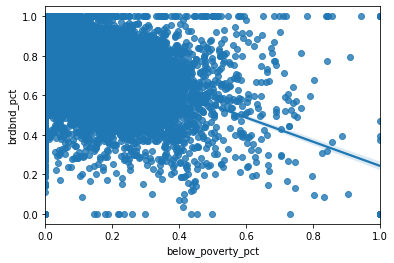

In [ ]:
sns.regplot(x="below_poverty_pct", y="brdbnd_pct", data=df, fit_reg=True);